<a href="https://colab.research.google.com/github/BluBloos/QMIND2021-2022/blob/main/src/HandTracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

In [ ]:
# Run this block only when in the colab

!echo "Initializing github repository"
!ls -la
!rm -r .config/
!rm -r sample_data/
!git clone https://github.com/BluBloos/QMIND2021-2022/ .

In [2]:
# Download updated project from Github.
!git pull

##### HANDLE DIFFS WHEN RUNNING IN COLAB #####
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
print("In Colab:", IN_COLAB)
import sys
if (IN_COLAB):
  sys.path.insert(1, '/content/src/')
##### HANDLE DIFFS WHEN RUNNING IN COLAB #####

########### TEST GPU AND RAM OF COLLAB INSTANCE ###########
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

# from psutil import virtual_memory
# ram_gb = virtual_memory().total / 1e9
# print('Your runtime has {:.1f} gigabytes of available RAM'.format(ram_gb))

# if ram_gb < 20:
#   print('Not using a high-RAM runtime')
# else:
#   print('You are using a high-RAM runtime!')
########### TEST GPU AND RAM OF COLLAB INSTANCE ###########

######### EXTERNAL LIBRARIES #########
import os
import pickle
import matplotlib.pyplot as plt
import imageio
import numpy as np
import time
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, UpSampling2D, MaxPool2D
from tensorflow.keras import Model
print("TensorFlow version:", tf.__version__)
#NOTE: Good resource. -> https://www.tensorflow.org/tutorials/quickstart/advanced
import cv2 # opencv, for image resizing.
######### EXTERNAL LIBRARIES #########

############## HELPER FUNCTIONS ############## 
# NOTE(Noah): Stole this function from Stackoverflow :)
def rgb2gray(rgb):
    return np.expand_dims(np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]), axis=2)
def resize(img, size):
    return cv2.resize(img, dsize=(size, size), interpolation=cv2.INTER_CUBIC)
############## HELPER FUNCTIONS ############## 

Already up to date.
In Colab: False
'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.
TensorFlow version: 2.6.0


# MODEL LOADING

In [3]:
# TODO(Noah): Get the MANO folders hosted in GCS so that this works again.
#   we note that this cost was tested and is in full working order, so 
#   the only thing not working is the lack of existence of MANO_DIR. 

# Setup some params.
IMAGE_SIZE = 224
GRAYSCALE = False
IMAGE_CHANNELS = 1 if GRAYSCALE else 3
BATCH_SIZE = 32
MANO_DIR = "mano_v1_2" if IN_COLAB else "../mano_v1_2"

from mobilehand import MAKE_MOBILE_HAND
from mobilehand_lfuncs import LOSS_3D

MOBILE_HAND = MAKE_MOBILE_HAND(IMAGE_SIZE, IMAGE_CHANNELS, BATCH_SIZE, MANO_DIR)

# INTEGRATION TEST
input_test = tf.random.uniform(shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, IMAGE_CHANNELS))
input_test = tf.cast(input_test, tf.float32)
output_test = MOBILE_HAND(input_test)
print(output_test)

# The lower training loop assumes that the model is set as such.
model = MOBILE_HAND

# The lower training loop also assumes that we have the loss function set like so.
loss_fn = lambda pred, gt : LOSS_3D(pred,gt) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 288)               177408    
_________________________________________________________________
dropout_1 (Dropout)          (None, 288)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 288)               83232     
_________________________________________________________________
dropout_2 (Dropout)          (None, 288)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 39)                11271     
Total params: 271,911
Trainable params: 271,911
Non-trainable params: 0
_________________________________________________________________
Unable to find MANO_RIGHT.pkl
tf.Tensor(
[[0.         0.14483525 0.44892585 ... 0.         0.38356107 0.        ]


# DATA LOADING

Begin single hand parse
00002.png
00005.png
00006.png
00007.png
00008.png
00013.png
00014.png
00018.png
00023.png
00026.png
00027.png
00032.png
00035.png
00036.png
00037.png
00039.png
00040.png
00041.png
00042.png
00043.png
00045.png
00046.png
00048.png
00050.png
00051.png
00053.png
00054.png
00056.png
00058.png
00059.png
00060.png
00061.png
00062.png
00063.png
00067.png
00068.png
00069.png
00070.png
00071.png
00074.png
00075.png
00078.png
00079.png
00084.png
00086.png
00091.png
00092.png
00094.png
00096.png
00097.png
00098.png
00101.png
00118.png
00121.png
00122.png
00123.png
00124.png
00126.png
00127.png
00133.png
00138.png
00139.png
00143.png
00144.png
00145.png
00146.png
00148.png
00149.png
00151.png
00152.png
00154.png
00156.png
00157.png
00160.png
00161.png
00162.png
00164.png
00167.png
00168.png
00172.png
00175.png
00178.png
00184.png
00185.png
00186.png
00188.png
00189.png
00190.png
00191.png
00197.png
Total elapsed time for single hand parse = 15.663835763931274 s
valid traini

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[-0.00488  -0.05724   0.7018  ]
 [-0.01406   0.03035   0.5829  ]
 [-0.02056   0.01356   0.6067  ]
 [-0.02833  -0.01342   0.6344  ]
 [-0.02037  -0.0345    0.6679  ]
 [ 0.01981   0.0278    0.5292  ]
 [ 0.01434   0.01526   0.5475  ]
 [ 0.007658 -0.003428  0.5729  ]
 [-0.001645 -0.02029   0.6021  ]
 [ 0.02355   0.06246   0.5643  ]
 [ 0.02565   0.03507   0.5711  ]
 [ 0.02679   0.008805  0.5783  ]
 [ 0.02054  -0.01729   0.6071  ]
 [ 0.0355    0.05862   0.5791  ]
 [ 0.03781   0.03081   0.5893  ]
 [ 0.03916   0.007767  0.5961  ]
 [ 0.03463  -0.01549   0.6197  ]
 [ 0.0599    0.04777   0.5969  ]
 [ 0.06011   0.03241   0.6036  ]
 [ 0.05921   0.01552   0.6101  ]
 [ 0.04836  -0.01112   0.639   ]]
Elapsed for LoadData evaluation 1.4271812438964844 s


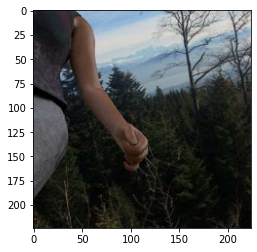

In [54]:
# more params to setup.
TRAIN_AMOUNT = 192 # must be multiple of 32
TEST_AMOUNT = 96 # must be multiple of 32

# Check if the dataset has been parsed yet. If not, parse.
data_dir = 'RHD_small' if IN_COLAB else '../RHD_small'
parsed_data_dir = 'SH_RHD' if IN_COLAB else '../SH_RHD'
import parsing_data
if not os.path.isdir(parsed_data_dir):
  os.mkdir(parsed_data_dir)
  os.mkdir(os.path.join(parsed_data_dir, 'evaluation'))
  os.mkdir(os.path.join(parsed_data_dir, 'evaluation', 'color'))
  os.mkdir(os.path.join(parsed_data_dir, 'training'))
  os.mkdir(os.path.join(parsed_data_dir, 'training', 'color'))
  parsing_data.parse_dataset(203, data_dir, parsed_data_dir)

data_dir = parsed_data_dir

# Load in the testing and training images.
x_train = np.zeros( (TRAIN_AMOUNT, IMAGE_SIZE, IMAGE_SIZE, IMAGE_CHANNELS) )
y_train = np.zeros( (TRAIN_AMOUNT, 21, 3) )
x_test = np.zeros( (TEST_AMOUNT, IMAGE_SIZE, IMAGE_SIZE, IMAGE_CHANNELS) ) 
y_test = np.zeros( (TEST_AMOUNT, 21, 3) )

def LoadData(dataAmount, dataType, anno_dir, np1,OUTPUT = False):
  path = os.path.join(data_dir, dataType, 'color')
  with open(os.path.join(anno_dir, dataType, 'anno_%s.pickle' % dataType), 'rb') as fi:
        anno_all = pickle.load(fi)

  count = 0
  index = 0
  for filename in os.listdir(path):
    sample_id = filename[0:5]
    sample_id = int(sample_id)
    if OUTPUT:
      kp_visible = (anno_all[sample_id]['uv_vis'][:, 2] == 1)
      case1 = np.sum(kp_visible[0:21])
      case2 = np.sum(kp_visible[21:])
      LEFT_HAND = (case1>case2)
      if LEFT_HAND:
        np1[index][:,:] = anno_all[sample_id]['xyz'][0:21]
      else:
        np1[index][:,:] = anno_all[sample_id]['xyz'][21:]      
    else:
      filePath = os.path.join(path, filename)
      image = imageio.imread(filePath)
      _image = image.astype('float32')
      if GRAYSCALE:
        _image = rgb2gray(_image / 255)
      else:
        _image = _image / 255
      _image = resize(_image, IMAGE_SIZE)
      
      np1[count, :, :, :] = _image
    
    index += 1
    count += 1
    if (count >= dataAmount):
      break

print("Loading in the training data samples...")
start_time = time.time()
LoadData(TRAIN_AMOUNT, 'training','../RHD_small', x_train)
x_train = x_train.astype('float32')
LoadData(TRAIN_AMOUNT, 'training', '../RHD_small', y_test, OUTPUT=True)
y_train = y_train.astype('float32')
end_time = time.time()
print('Elapsed for LoadData training', end_time - start_time, 's')

print("Loading in the evaluation data samples...")
start_time = time.time()
LoadData(TEST_AMOUNT, 'evaluation', '../RHD_small', x_test)
x_test = x_test.astype('float32')
LoadData(TEST_AMOUNT, 'evaluation', '../RHD_small', y_test, OUTPUT = True)
y_test = y_test.astype('float32')
end_time = time.time()
print('Elapsed for LoadData evaluation', end_time - start_time, 's')

# Test print one of the images from the dataset.
_test = x_train[0] 
plt.imshow(_test)
plt.show()
# _test = y_train[0]
# plt.imshow(np.squeeze(_test))
# plt.show()

# Batch the data for tensorflow.
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# TODO(Noah): Is it feasible to now delete all the intermediate numpy arrays?
# TODO(Noah): Integrate code that max wrote to check if the dataset has been parsed.
# if the dataset has not been parsed yet, parse it, then load.

# TRAINING LOOP

In [ ]:
class StupidSimpleLossMetric():
    def __init__(self):
        self.losses = [] # empty python array 
    def __call__(self, loss):
        self.losses.append(loss)
    def result(self):
        return sum(self.losses) / len(self.losses)
    def reset_states(self):
        self.losses = []

optimizer = tf.keras.optimizers.Adam() # defaults should work just fine
train_loss = StupidSimpleLossMetric()
test_loss = StupidSimpleLossMetric()

# loss_fn = keras.losses.BinaryCrossentropy(from_logits=False) # from_logits=False just means that the values are between zero and one (a probability).
# loss_fn = lambda x, y: tf.math.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(x, y))

# train_accuracy = tf.keras.metrics.MeanAbsolutePercentageError(name='train_accuracy')
# test_accuracy = tf.keras.metrics.MeanAbsolutePercentageError(name='test_accuracy')

# @tf.function Compiles a function into a callable TensorFlow graph.
# https://www.tensorflow.org/guide/intro_to_graphs
'''def custom_loss_func(pred, labels):
    #return tf.math.reduce_sum( tf.math.square(labels - tf.cast(pred,tf.float64)))
    # now trying pixel-wise cross-entropy loss
    return -tf.math.reduce_sum(tf.math.log(pred) * labels)
'''

# Loss function unit test
input = tf.zeros([1, 39])  # mock pred of all zeros
label = np.expand_dims(y_train[0], axis=0)
loss = loss_fn(input, label)
print('Loss for pred of all zeros', loss.numpy())
#loss2 = loss_fn(label, label)
#print('Loss for perfect prediction', loss2.numpy())
input2 = tf.ones([1, 39])
loss3 = loss_fn(input2, label)
print('Loss for pred of all ones', loss3.numpy())

@tf.function
def train_step(input, gt):
    with tf.GradientTape() as tape:
        predictions = model(input)
        #loss = loss_func(predictions, segmentation_masks)
        #loss = np.dot(tf.reshape(segmentation_masks, [102400], tf.reshape(predictions, [102400])
        loss = loss_fn(predictions, gt)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss
    #train_accuracy(labels, predictions)
  
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  return loss_fn(predictions, labels)
  #test_accuracy(labels, predictions)

In [ ]:
# TODO: Reimplement loading in the saved model weights
# model.load_weights(checkpoint_path)

EPOCHS = 10 # sure...

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  print("Epoch", epoch)
  start = time.time()
  train_loss.reset_states()
  #train_accuracy.reset_states()
  test_loss.reset_states()
  #test_accuracy.reset_states()

  for images, labels in train_ds:
    loss = train_step(images, labels)
    train_loss(loss.numpy())

  for test_images, test_labels in test_ds:
    loss = test_step(test_images, test_labels)
    test_loss(loss.numpy())

  end = time.time()

  print(
    f'Epoch {epoch + 1}, '
    f'Time {end-start} s'
    f'Loss: {train_loss.result()}, '
    f'Test Loss: {test_loss.result()}, '
  )

  # for each epoch, we want to show the 
  #pred = model( _image )
  #plt.imshow(np.squeeze(pred))
  #plt.show()

# Save the model parameters
# TODO: Make it such that model parameters are saved after x many epochs as opposed to however
#   many epochs the model will be trained in total
#save_dir = '/content/drive/My Drive'
#checkpoint_path = save_dir + "/cp-{epoch:04d}.ckpt"
#model.save('current_model.h5py',save_path)
#model.save_weights(checkpoint_path.format(epoch=40))